# Natural Disasters

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
#load dataset
disasters = pd.read_csv('1900_2021_DISASTERS.csv')
disasters

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16121,2021,449,FL-2021-000110,Natural,Hydrological,Flood,NaN,NaN,NaN,Yemen,...,67980.0,NaN,67980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16122,2021,75,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,South Africa,...,400.0,NaN,400.0,NaN,75000.0,NaN,1;2,2707;77311;77312;77313;77315,77364;77367,"Free State, KwaZulu-Natal, Limpopo, Mpumalanga..."
16123,2021,599,EP-2021-000138,Natural,Biological,Epidemic,Viral disease,NaN,Meningitis,Congo (the Democratic Republic of the),...,NaN,NaN,301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16124,2021,20,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Serbia,...,22.0,NaN,22.0,NaN,NaN,NaN,1,25374;25378;25379;25380;25383;25386;25397,NaN,"Jablanicki, Kosovski, Kosovsko-mitrovatski, Ko..."


In [3]:
#See the null values
disasters.isnull().sum()

Year                              0
Seq                               0
Glide                         14545
Disaster Group                    0
Disaster Subgroup                 0
Disaster Type                     0
Disaster Subtype               3110
Disaster Subsubtype           15049
Event Name                    12265
Country                           0
ISO                               0
Region                            0
Continent                         0
Location                       1792
Origin                        12332
Associated Dis                12778
Associated Dis2               15419
OFDA Response                 14432
Appeal                        13557
Declaration                   12870
Aid Contribution              15449
Dis Mag Value                 11180
Dis Mag Scale                  1190
Latitude                      13397
Longitude                     13394
Local Time                    15023
River Basin                   14839
Start Year                  

In [4]:
#Clean the column names
disasters.columns = disasters.columns.str.lower()
disasters.columns = disasters.columns.str.replace(' ', '_')

In [5]:
disasters.value_counts('disaster_subgroup')

disaster_subgroup
Hydrological         6327
Meteorological       5100
Geophysical          1857
Biological           1598
Climatological       1243
Extra-terrestrial       1
Name: count, dtype: int64

In [6]:
disasters_columns = disasters[['year', 'disaster_subgroup', 'disaster_type', 'country', 'region', 'continent', 'start_month', 'end_month', 'total_deaths']]
disasters_columns

,year,disaster_subgroup,disaster_type,country,region,continent,start_month,end_month,total_deaths
0,1900,Climatological,Drought,Cabo Verde,Western Africa,Africa,NaN,NaN,11000.0
1,1900,Climatological,Drought,India,Southern Asia,Asia,NaN,NaN,1250000.0
2,1902,Geophysical,Earthquake,Guatemala,Central America,Americas,4.0,4.0,2000.0
3,1902,Geophysical,Volcanic activity,Guatemala,Central America,Americas,4.0,4.0,1000.0
4,1902,Geophysical,Volcanic activity,Guatemala,Central America,Americas,10.0,10.0,6000.0
...,...,...,...,...,...,...,...,...,...
16121,2021,Hydrological,Flood,Yemen,Western Asia,Asia,7.0,8.0,11.0
16122,2021,Hydrological,Flood,South Africa,Southern Africa,Africa,2.0,2.0,31.0
16123,2021,Biological,Epidemic,Congo (the Democratic Republic of the),Middle Africa,Africa,9.0,9.0,131.0
16124,2021,Hydrological,Flood,Serbia,Southern Europe,Europe,1.0,1.0,NaN


In [7]:
#List of desired subgroups
desired_subgroups = ['Hydrological', 'Meteorological', 'Geophysical', 'Climatological', 'Biological']

# Filter the DataFrame to keep only the rows with desired subgroups
disasters_columns = disasters_columns[disasters_columns['disaster_subgroup'].isin(desired_subgroups)]
disasters_columns

,year,disaster_subgroup,disaster_type,country,region,continent,start_month,end_month,total_deaths
0,1900,Climatological,Drought,Cabo Verde,Western Africa,Africa,NaN,NaN,11000.0
1,1900,Climatological,Drought,India,Southern Asia,Asia,NaN,NaN,1250000.0
2,1902,Geophysical,Earthquake,Guatemala,Central America,Americas,4.0,4.0,2000.0
3,1902,Geophysical,Volcanic activity,Guatemala,Central America,Americas,4.0,4.0,1000.0
4,1902,Geophysical,Volcanic activity,Guatemala,Central America,Americas,10.0,10.0,6000.0
...,...,...,...,...,...,...,...,...,...
16121,2021,Hydrological,Flood,Yemen,Western Asia,Asia,7.0,8.0,11.0
16122,2021,Hydrological,Flood,South Africa,Southern Africa,Africa,2.0,2.0,31.0
16123,2021,Biological,Epidemic,Congo (the Democratic Republic of the),Middle Africa,Africa,9.0,9.0,131.0
16124,2021,Hydrological,Flood,Serbia,Southern Europe,Europe,1.0,1.0,NaN


In [8]:
disasters_columns.describe()

,year,start_month,end_month,total_deaths
count,16125.000000,15738.000000,15417.000000,1.141300e+04
mean,1996.763783,6.444656,6.577025,2.842866e+03
std,20.159285,3.393888,3.352872,6.860595e+04
min,1900.000000,1.000000,1.000000,1.000000e+00
25%,1989.000000,4.000000,4.000000,6.000000e+00
50%,2001.000000,7.000000,7.000000,2.000000e+01
75%,2011.000000,9.000000,9.000000,6.300000e+01
max,2021.000000,12.000000,12.000000,3.700000e+06


In [9]:
# Count of null values
disasters_columns.isnull().sum()

year                    0
disaster_subgroup       0
disaster_type           0
country                 0
region                  0
continent               0
start_month           387
end_month             708
total_deaths         4712
dtype: int64

In [10]:
# Filling null values in the 'end_month' column with the mode
disasters_columns['start_month'].fillna(disasters_columns['start_month'].mode()[0], inplace=True)
disasters_columns['end_month'].fillna(disasters_columns['end_month'].mode()[0], inplace=True)
disasters_columns

#Filling null values in the 'total_deaths' column with 0
disasters_columns['total_deaths'].fillna(0, inplace=True)


C:\Users\jessi\AppData\Local\Temp\ipykernel_20196\1605979123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disasters_columns['start_month'].fillna(disasters_columns['start_month'].mode()[0], inplace=True)
C:\Users\jessi\AppData\Local\Temp\ipykernel_20196\1605979123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disasters_columns['end_month'].fillna(disasters_columns['end_month'].mode()[0], inplace=True)
C:\Users\jessi\AppData\Local\Temp\ipykernel_20196\1605979123.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

In [11]:
desired_categories = ['Flood', 'Storm', 'Earthquake', 'Epidemic', 'Landslide', 'Drought', 'Extreme temperature', 'Wildfire', 'Volcanic activity']

# Filtering the DataFrame based on desired categories
disasters_columns = disasters_columns[disasters_columns['disaster_type'].isin(desired_categories)]

In [12]:
disasters_columns

,year,disaster_subgroup,disaster_type,country,region,continent,start_month,end_month,total_deaths
0,1900,Climatological,Drought,Cabo Verde,Western Africa,Africa,1.0,8.0,11000.0
1,1900,Climatological,Drought,India,Southern Asia,Asia,1.0,8.0,1250000.0
2,1902,Geophysical,Earthquake,Guatemala,Central America,Americas,4.0,4.0,2000.0
3,1902,Geophysical,Volcanic activity,Guatemala,Central America,Americas,4.0,4.0,1000.0
4,1902,Geophysical,Volcanic activity,Guatemala,Central America,Americas,10.0,10.0,6000.0
...,...,...,...,...,...,...,...,...,...
16121,2021,Hydrological,Flood,Yemen,Western Asia,Asia,7.0,8.0,11.0
16122,2021,Hydrological,Flood,South Africa,Southern Africa,Africa,2.0,2.0,31.0
16123,2021,Biological,Epidemic,Congo (the Democratic Republic of the),Middle Africa,Africa,9.0,9.0,131.0
16124,2021,Hydrological,Flood,Serbia,Southern Europe,Europe,1.0,1.0,0.0


In [ ]:
#save dataframe
#disasters_columns.to_csv('disasters_columns_clean.csv', index=False)

In [ ]:
disasters_columns.value_counts('disaster_type')

## EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x='start_month', y='total_deaths', data=disasters_columns)
plt.title('Relation Between the Month and the Number of Deaths')
plt.show()

In [ ]:
# Group by Year and see the occurrence count
dados_por_ano = disasters_columns.groupby('year')['total_deaths'].count()
plt.figure(figsize=(12, 8))
dados_por_ano.plot(kind='bar')
plt.title('Number of Occurrences per Year')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
#plt.show()

In [ ]:
#Which month has the most disasters

import pandas as pd
import matplotlib.pyplot as plt

disasters_columns['start_month'] = disasters_columns['start_month'].astype(int)

# Count of disaster occurrences per month
monthly_counts = disasters_columns['start_month'].value_counts().sort_index()

# Mapping month numbers to names
month_names = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]

# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(month_names, monthly_counts, color='skyblue')
plt.title('Number of Disasters per Month')
plt.xlabel('Month')
plt.ylabel('Number of Disasters')
plt.show()

In [ ]:
floods_df = disasters_columns[disasters_columns['disaster_type'] == 'Flood']

# Group by country and count the occurrences of floods
country_flood_counts = floods_df['country'].value_counts()

# Get the country with the maximum number of floods
country_with_most_floods = country_flood_counts.idxmax()

# Print the result
print(f"The country with the most floods is: {country_with_most_floods}")

In [ ]:
floods_df = disasters_columns[(disasters_columns['disaster_type'] == 'Flood') & (disasters_columns['year'] >= 2016) & (disasters_columns['year'] <= 2021)]

# Group by country and count the occurrences of floods
country_flood_counts = floods_df.groupby('country').size().reset_index(name='count')

# Sort the data by count in descending order
country_flood_counts = country_flood_counts.sort_values(by='count', ascending=False)

# Select the top 5 countries
top5_countries = country_flood_counts.head(5)

# Create the bar plot for the top 5 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='country', data=top5_countries, palette='viridis')
plt.title('Top 5 Countries with the Most Floods (2016-2021)')
plt.xlabel('Number of Floods')
plt.ylabel('Country')
plt.show()

In [ ]:
# Filter rows for floods and the years 2016 to 2021
floods_df = disasters_columns[(disasters_columns['disaster_type'] == 'Flood') & (disasters_columns['year'] >= 2016) & (disasters_columns['year'] <= 2021)]

# Group by country and count the occurrences of floods
country_flood_counts = floods_df.groupby('country').size().reset_index(name='count')

# Sort the data by count in ascending order to get the least affected countries
country_flood_counts = country_flood_counts.sort_values(by='count')

# Select the bottom 5 countries
bottom5_countries = country_flood_counts.head(5)

# Create the bar plot for the bottom 5 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='country', data=bottom5_countries, palette='viridis')
plt.title('Top 5 Countries with the Fewest Floods (2016-2021)')
plt.xlabel('Number of Floods')
plt.ylabel('Country')
plt.show()

In [ ]:
#!pip install geopandas matplotlib plotly
#Load Geospatial Data
import geopandas as gpd

#Load the Natural Earth dataset with country geometries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

In [ ]:
#Merge Geospatial Data with Disaster Data
merged_data = world.merge(disasters_columns, how='left', left_on='name', right_on='country')
merged_data

In [ ]:
#Map Distribution of Different Types of Disasters

import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='disaster_type', legend=True, ax=ax, legend_kwds={'bbox_to_anchor': (1, 1)})
plt.title('Distribution of Different Types of Disasters')
plt.show()

## Building the Model

In [13]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder

#Encode the categorical
columns_to_encode = ['disaster_subgroup', 'disaster_type', 'country', 'region', 'continent']

label_encoder = LabelEncoder()
for column in columns_to_encode:
    disasters_columns[column] = label_encoder.fit_transform(disasters_columns[column])

C:\Users\jessi\AppData\Local\Temp\ipykernel_20196\3464331930.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disasters_columns[column] = label_encoder.fit_transform(disasters_columns[column])
C:\Users\jessi\AppData\Local\Temp\ipykernel_20196\3464331930.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disasters_columns[column] = label_encoder.fit_transform(disasters_columns[column])
C:\Users\jessi\AppData\Local\Temp\ipykernel_20196\3464331930.py:10: SettingWithCopyWarning: 
A value is trying to be s

In [ ]:
#Processing Data

In [14]:
#Drop the columns that a don't want
#I can only have columns that a can insert in the Streamlit bacause i want to try to predict
disasters_columns = disasters_columns.drop(['disaster_subgroup', 'region', 'continent', 'end_month', 'total_deaths'], axis=1)

In [15]:
disasters_columns.dtypes

year               int64
disaster_type      int32
country            int32
start_month      float64
dtype: object

In [16]:
X = disasters_columns.drop(['disaster_type'],axis=1)
y = disasters_columns['disaster_type']
disasters_columns

,year,disaster_type,country,start_month
0,1900,0,31,1.0
1,1900,0,89,1.0
2,1902,1,80,4.0
3,1902,6,80,4.0
4,1902,6,80,10.0
...,...,...,...,...
16121,2021,3,222,7.0
16122,2021,3,184,2.0
16123,2021,2,43,9.0
16124,2021,3,174,1.0


In [17]:
#we only have numerical columns so we dont need to separate into x and y (X_train_cat , X_train_num , X_test_cat , X_test_num)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [18]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
print(X_train_scaled.shape)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled

(12299, 3)


,year,country,start_month
0,0.966942,0.422907,0.000000
1,0.760331,0.149780,0.000000
2,0.909091,0.352423,0.454545
3,0.950413,0.066079,0.545455
4,0.578512,0.682819,0.272727
...,...,...,...
12294,0.933884,0.431718,0.818182
12295,0.842975,0.678414,0.909091
12296,0.966942,0.938326,0.090909
12297,0.818182,0.651982,0.181818


In [19]:
X_test_scaled = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled

,year,country,start_month
0,0.884298,0.515419,0.181818
1,0.876033,0.960352,0.272727
2,0.537190,0.110132,0.545455
3,0.818182,0.563877,0.636364
4,0.776860,0.066079,0.363636
...,...,...,...
3070,0.933884,0.938326,0.454545
3071,0.694215,0.938326,0.272727
3072,0.685950,0.819383,0.090909
3073,0.851240,0.268722,0.545455


<Axes: xlabel='disaster_type'>

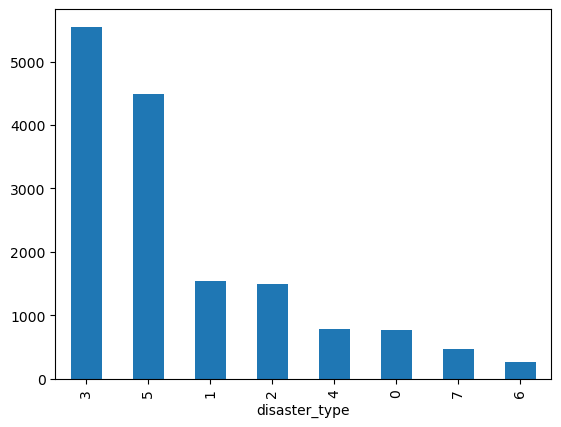

In [20]:
#I have imbalance data
count_classes = disasters_columns['disaster_type'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

## Logistic Regression Model

In [ ]:
#Evaluate the model.
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test) 

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')
f1 = f1_score(y_test, pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

## - SMOTE

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
sm = SMOTE(random_state=100, k_neighbors=5)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [26]:
X_train_SMOTE.shape

(35520, 3)

In [27]:
from sklearn.metrics import accuracy_score

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)

# Make predictions
pred = LR.predict(X_test_scaled)

# Calculate and print the metrics
precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')
f1 = f1_score(y_test, pred, average='macro')
accuracy = accuracy_score(y_test, pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)

Precision:  0.17525017723155856
Recall:  0.19712779302071104
F1 Score:  0.16470161902268313
Accuracy:  0.23739837398373984


In [28]:
#To increase the number of iterations for the lbfgs solver in your logistic regression model i will modify the max_iter parameter

from sklearn.metrics import accuracy_score

LR = LogisticRegression(random_state=0, solver='lbfgs', max_iter=400)
LR.fit(X_train_SMOTE, y_train_SMOTE)

# Make predictions
pred = LR.predict(X_test_scaled)

# Calculate and print the metrics
precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')
f1 = f1_score(y_test, pred, average='macro')
accuracy = accuracy_score(y_test, pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)

#The results didn't inscrease

Precision:  0.17525017723155856
Recall:  0.19712779302071104
F1 Score:  0.16470161902268313
Accuracy:  0.23739837398373984


## Multiple Models - (without the SMOTE)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:
models = {
    "Logistic Regression": LogisticRegression(random_state=0, solver='lbfgs'),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=0),
    "Neural Network": MLPClassifier(random_state=0)
}

In [23]:
for name, model in models.items():
    # Treinar o modelo
    model.fit(X_train_scaled, y_train)
    
    # Fazer previsões
    predictions = model.predict(X_test_scaled)

    # Avaliar o modelo
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')

    # Imprimir os resultados
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

C:\Users\jessi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Logistic Regression
Accuracy: 0.3899
Precision: 0.1447
Recall: 0.1519
F1 Score: 0.1289

Model: Decision Tree
Accuracy: 0.4114
Precision: 0.2741
Recall: 0.2715
F1 Score: 0.2717

Model: Random Forest
Accuracy: 0.4289
Precision: 0.2787
Recall: 0.2584
F1 Score: 0.2648



C:\Users\jessi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jessi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: SVM
Accuracy: 0.4046
Precision: 0.1775
Recall: 0.1548
F1 Score: 0.1298

Model: KNN
Accuracy: 0.4127
Precision: 0.2406
Recall: 0.2273
F1 Score: 0.2267

Model: Naive Bayes
Accuracy: 0.4000
Precision: 0.1464
Recall: 0.1627
F1 Score: 0.1369

Model: Gradient Boosting
Accuracy: 0.5041
Precision: 0.4039
Recall: 0.2622
F1 Score: 0.2766

Model: Neural Network
Accuracy: 0.4124
Precision: 0.2214
Recall: 0.1805
F1 Score: 0.1737



C:\Users\jessi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jessi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#y_test

In [ ]:
#X_train_scaled

In [ ]:
#X[(X['year']==2010)&(X_train['country']==57)&(X_train['start_month']==5)]

In [ ]:
disasters_columns

# Second Dataset

In [ ]:
import pickle


gradient_boosting_model = models['Gradient Boosting']

# Save the MinMaxScaler
with open('minmax_scaler.pkl', 'wb') as file:
    pickle.dump(transformer, file)

# Save the LabelEncoder
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

# Save the GradientBoostingClassifier
with open('gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(gradient_boosting_model, file)

In [ ]:
import streamlit as st
import pandas as pd
import pickle

# Load the saved models
with open('minmax_scaler.pkl', 'rb') as file:
    minmax_scaler = pickle.load(file)

with open('label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)

with open('gradient_boosting_model.pkl', 'rb') as file:
    gradient_boosting_model = pickle.load(file)

# Streamlit user interface
st.title('Disaster Type Prediction')

# Example of user input collection
disaster_subgroup = st.selectbox('Select Disaster Subgroup', options=['Subgroup1', 'Subgroup2', 'Subgroup3'])
country = st.text_input('Enter Country')
region = st.text_input('Enter Region')
continent = st.text_input('Enter Continent')

# When 'Predict' button is clicked
if st.button('Predict'):
    # Create a DataFrame from the inputs
    input_data = pd.DataFrame([[disaster_subgroup, country, region, continent]],
                              columns=['disaster_subgroup', 'country', 'region', 'continent'])
    
    # Encode the inputs
    for column in ['disaster_subgroup', 'country', 'region', 'continent']:
        input_data[column] = label_encoder.transform(input_data[column])

    # Scale the inputs
    input_data_scaled = minmax_scaler.transform(input_data)

    # Make prediction
    prediction = gradient_boosting_model.predict(input_data_scaled)
    predicted_type = prediction[0]

    # Display the prediction
    st.write(f'Predicted Disaster Type: {predicted_type}')

# Run the Streamlit app by typing in the terminal:
# streamlit run your_script_name.py